In [11]:
## D2S Amp Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
param_master = pd.read_csv("d2s_char_master_NP_ratio_8.csv")

In [13]:
kgm_n = param_master['kgmn Y']
kgm_p = param_master['kgmp Y']
kcsg_p = param_master['kcsg_p Y']
kgds_n = param_master['kgds_n Y']
kgds_p = param_master['kgds_p Y']
kcgd_n = param_master['kcgd_n Y']
kcgs_n = param_master['kcgs_n Y']
ids = param_master['kgmn X']

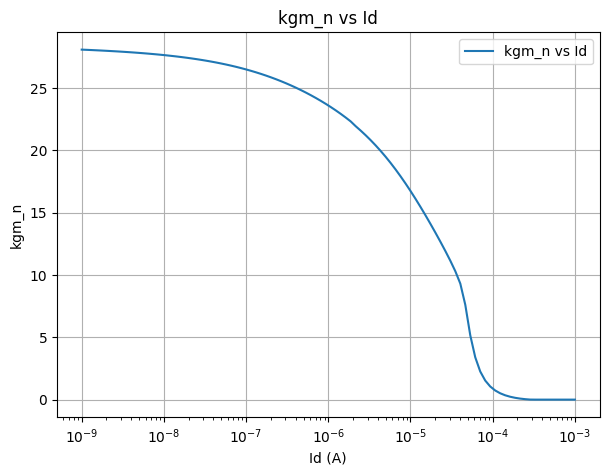

In [14]:
## Kgm vs Id curves for verification
plt.figure(figsize=(7,5))
plt.plot(ids, kgm_n, label='kgm_n vs Id')
plt.xscale('log')
plt.xlabel('Id (A)')
plt.ylabel('kgm_n')
plt.title('kgm_n vs Id')
plt.grid(True)
plt.legend()
plt.show()

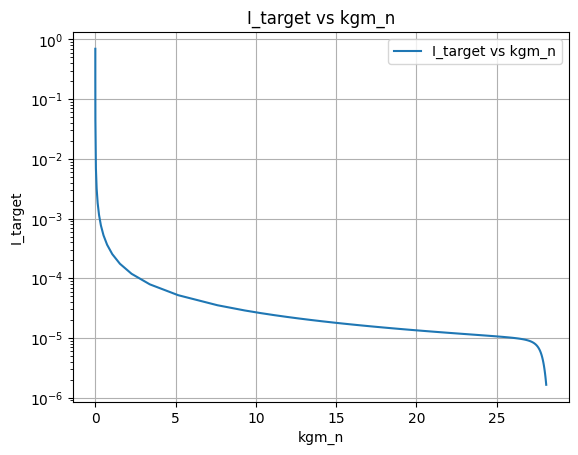

At kgm_n = 25 S, I = 10.610733617227398 uA
At kgm_n = 25 S, M_scale = 26.283599046591572


In [15]:
## Defining specs

Av_target = 20
f_bw = 2e6
GBW_target = Av_target * f_bw
C_L = 1.07e-12 # Estimated value from second stage of the error amplifier

I_target = 2*np.pi*GBW_target*C_L/(kgm_n - (2*np.pi*GBW_target*(kcgd_n + 1*kcsg_p)))

plt.plot(kgm_n, I_target, label='I_target vs kgm_n')
plt.yscale('log')
plt.xlabel('kgm_n')
plt.ylabel('I_target')
plt.title('I_target vs kgm_n')
plt.grid(True)
plt.legend()
plt.show()

kgm_n_target = 25
I_target_index = (np.abs(kgm_n - kgm_n_target)).idxmin()
I_1 = I_target[I_target_index]
ids_ref = ids[I_target_index]
M_scale = I_1/ids_ref
print(f"At kgm_n = {kgm_n_target} S, I = {I_target[I_target_index]*1e6} uA")
print(f"At kgm_n = {kgm_n_target} S, M_scale = {M_scale}")

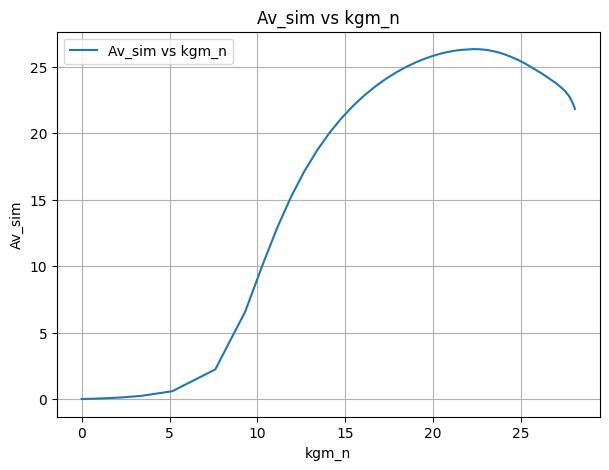

In [16]:
Av_sim = kgm_n/(kgds_n + np.abs(kgds_p))
plt.figure(figsize=(7,5))
plt.plot(kgm_n, Av_sim, label='Av_sim vs kgm_n')
plt.xlabel('kgm_n')
plt.ylabel('Av_sim')
plt.title('Av_sim vs kgm_n')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
kgds_eff = (kgds_n + np.abs(kgds_p))

# R_eff = 1/(ids*kgds_eff)

# plt.figure(figsize=(7,5))
# plt.plot(ids, R_eff, label='R_eff vs Id')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Id (A)')
# plt.ylabel('R_eff (Ohm)')
# plt.title('R_eff vs Id')
# plt.grid(True)
# plt.legend()
# plt.show()

# # Find the index where ids is closest to I_1
# idx_closest = (np.abs(ids - I_1)).idxmin()
# R_eff_at_I1 = R_eff[idx_closest]
R_eff_at_I1 = 1/(I_1*kgds_eff[I_target_index])
print(f"R_eff at I_1 = {I_1:.6e} A is {R_eff_at_I1:.2e} Ohm")

gds_eff = 1 / R_eff_at_I1
print(f"gds_eff at I_1 = {I_1:.6e} A is {gds_eff:.2e} S")
gds_n_at_I1 = kgds_n[I_target_index]*I_1
print(f"gds_n at I_1 = {I_1*1e6:.2f} uA is {gds_n_at_I1*1e3:.3f} mS")
gds_p_at_I1 = np.abs(kgds_p[I_target_index])*I_1
print(f"gds_p at I_1 = {I_1*1e6:.2f} uA is {gds_p_at_I1*1e3:.3f} mS")


gmn_target = kgm_n_target * I_1
Av_target_check = gmn_target * R_eff_at_I1
print(f"At I_1 = {I_1*1e6:.2f} uA, gmn = {gmn_target*1e3:.2f} mS, Av = {Av_target_check:.2f}")



R_eff at I_1 = 1.061073e-05 A is 9.56e+04 Ohm
gds_eff at I_1 = 1.061073e-05 A is 1.05e-05 S
gds_n at I_1 = 10.61 uA is 0.006 mS
gds_p at I_1 = 10.61 uA is 0.004 mS
At I_1 = 10.61 uA, gmn = 0.27 mS, Av = 25.35


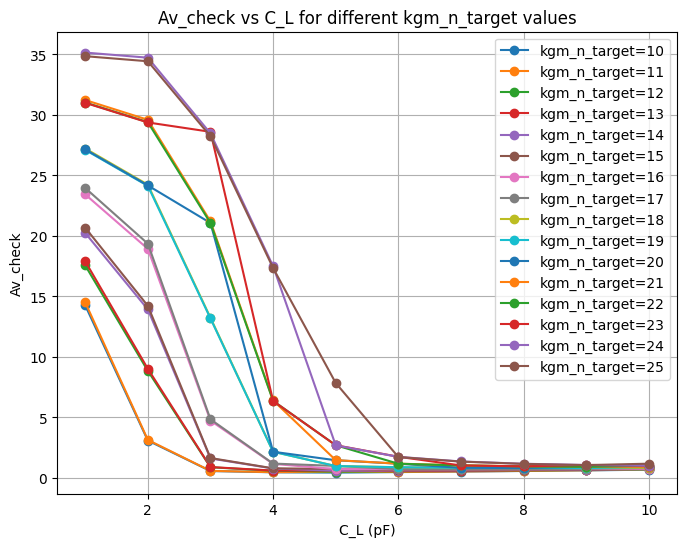

In [18]:
def sweep_CL_and_plot_Av_check(CL_values, kgm_n, kgds_n, kgds_p, kgm_p, kcgd_n, kcsg_p, Av_target, f_bw, kgm_n_target, ids):
    GBW_target = Av_target * f_bw
    Av_check_list = []
    I_1_list = []
    for C_L in CL_values:
        I_target = 2 * np.pi * GBW_target * C_L / (kgm_n - (2 * np.pi * GBW_target * (kcgd_n + 1 * kcsg_p)))
        I_target_index = (np.abs(kgm_n - kgm_n_target)).idxmin()
        I_1 = I_target[I_target_index]
        kgds_eff = (kgds_n + np.abs(kgds_p))
        R_eff = 1 / (ids * kgds_eff)
        idx_closest = (np.abs(ids - I_1)).idxmin()
        R_eff_at_I1 = R_eff[idx_closest]
        gmn_target = kgm_n_target * I_1
        Av_target_check = gmn_target * R_eff_at_I1
        Av_check_list.append(Av_target_check)
        I_1_list.append(I_1)
    # plt.figure(figsize=(7,5))
    # plt.plot(CL_values * 1e12, Av_check_list, marker='o')
    # plt.xlabel('C_L (pF)')
    # plt.ylabel('Av_check')
    # plt.title('Av_check vs C_L')
    # plt.grid(True)
    # plt.show()
    return np.array(Av_check_list), np.array(I_1_list)

# Example usage:
C_L_values = np.linspace(1e-12, 10e-12, 10)  # Sweep C_L from 1pF to 10pF
kgm_n_target_values = np.linspace(10, 25, 16)
Av_check_sweep = []
I_1_sweep = []

# Sweep and collect results for each kgm_n_target_val
for kgm_n_target_val in kgm_n_target_values:
    Av_arr, I_arr = sweep_CL_and_plot_Av_check(
        C_L_values, kgm_n, kgds_n, kgds_p, kgm_p, kcgd_n, kcsg_p,
        Av_target, f_bw, kgm_n_target_val, ids
    )
    Av_check_sweep.append(Av_arr)
    I_1_sweep.append(I_arr)

# Overlap plots for all kgm_n_target_values in a single figure
plt.figure(figsize=(8,6))
for i, kgm_n_target_val in enumerate(kgm_n_target_values):
    plt.plot(C_L_values * 1e12, Av_check_sweep[i], marker='o', label=f'kgm_n_target={kgm_n_target_val:.0f}')
plt.xlabel('C_L (pF)')
plt.ylabel('Av_check')
plt.title('Av_check vs C_L for different kgm_n_target values')
plt.grid(True)
plt.legend()
plt.show()
